In [9]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import pickle

In [10]:
address_main = '/Users/vu/surfdrive/PostDoc/VUMC projrct/Related Matterials/Positive and unlabeled dataset/Code/estimate rho/'
#address_date = address_main + 'iris.csv'
address_pickles = address_main+ 'iris_pickle_3.pickle'
address_save_figure = address_main+'estimate_rho,Iris_dataset.png'

# Load Pickles

In [11]:
with open(address_pickles, "rb") as input_file:
    [All_estimate_rhos_linear,All_estimate_rhos_RF] = pickle.load(input_file)

### change zeros with minimum number

In [12]:
for rho in All_estimate_rhos_RF.keys():
    for i in range(0,len(All_estimate_rhos_RF[rho])):
        if All_estimate_rhos_RF[rho][i]==0:
            All_estimate_rhos_RF[rho][i] = 2/50


### Make Graphs

In [14]:
max_rhos_linear = []
max_rhos_RF = []

qua_rhos_linear_10 = []
qua_rhos_RF_10 = []

avg_rhos_linear = []
avg_rhos_RF = []

median_rhos_linear = []
media_rhos_RF = []

qua_rhos_linear_90 = []
qua_rhos_RF_90 = []

min_rhos_linear = []
min_rhos_RF = []

rhos = []
for rho in All_estimate_rhos_linear.keys():
    rhos.append(rho)
    
    min_rhos_linear.append(np.min(All_estimate_rhos_linear[rho]))
    min_rhos_RF.append(np.min(All_estimate_rhos_RF[rho]))
    
    qua_rhos_linear_10.append(np.percentile(All_estimate_rhos_linear[rho], 10))
    qua_rhos_RF_10.append(np.percentile(All_estimate_rhos_RF[rho],10))
    
    avg_rhos_linear.append(np.mean(All_estimate_rhos_linear[rho]))
    avg_rhos_RF.append(np.mean(All_estimate_rhos_RF[rho]))
    
    median_rhos_linear.append(np.percentile(All_estimate_rhos_linear[rho], 50))
    media_rhos_RF.append(np.percentile(All_estimate_rhos_RF[rho],50))
    
    qua_rhos_linear_90.append(np.percentile(All_estimate_rhos_linear[rho], 90))
    qua_rhos_RF_90.append(np.percentile(All_estimate_rhos_RF[rho],90))
    
    max_rhos_linear.append(np.max(All_estimate_rhos_linear[rho]))
    max_rhos_RF.append(np.max(All_estimate_rhos_RF[rho]))



## Graphs

#### Both Linear and RF

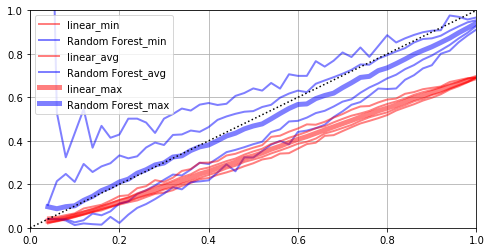

In [6]:
plt.figure(figsize=(8,4))
plt.plot(rhos ,min_rhos_linear, c='r',alpha = 0.5 ,linewidth=2.0)
plt.plot(rhos ,min_rhos_RF, c='b',alpha = 0.5 ,linewidth=2.0)

plt.plot(rhos ,qua_rhos_linear_10, c='r',alpha = 0.5 ,linewidth=2.0)
plt.plot(rhos ,qua_rhos_RF_10, c='b',alpha = 0.5 ,linewidth=2.0)

plt.plot(rhos ,avg_rhos_linear, c='r',alpha = 0.5 ,linewidth=5.0)
plt.plot(rhos ,avg_rhos_RF, c='b',alpha = 0.5 ,linewidth=5.0)

plt.plot(rhos ,qua_rhos_linear_90, c='r',alpha = 0.5 ,linewidth=2.0)
plt.plot(rhos ,qua_rhos_RF_90, c='b',alpha = 0.5 ,linewidth=2.0)

plt.plot(rhos ,max_rhos_linear, c='r',alpha = 0.5 ,linewidth=2.0)
plt.plot(rhos ,max_rhos_RF, c='b',alpha = 0.5 ,linewidth=2.0)

plt.legend(['linear_min','Random Forest_min',
            'linear_avg','Random Forest_avg',
           'linear_max','Random Forest_max',])

plt.plot([0,1],[0,1],color='k', linestyle = ':')
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(axis='both')
plt.show()

#### Just Linear

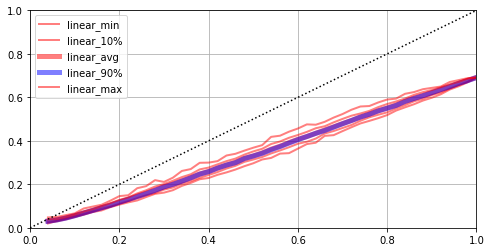

In [15]:
plt.figure(figsize=(8,4))
plt.plot(rhos ,min_rhos_linear, c='r',alpha = 0.5 ,linewidth=2.0)


plt.plot(rhos ,qua_rhos_linear_10, c='r',alpha = 0.5 ,linewidth=2.0)


plt.plot(rhos ,avg_rhos_linear, c='r',alpha = 0.5 ,linewidth=5.0)
plt.plot(rhos ,median_rhos_linear, c='b',alpha = 0.5 ,linewidth=5.0)

plt.plot(rhos ,qua_rhos_linear_90, c='r',alpha = 0.5 ,linewidth=2.0)


plt.plot(rhos ,max_rhos_linear, c='r',alpha = 0.5 ,linewidth=2.0)


plt.legend(['linear_min',
            'linear_10%',
            'linear_avg',
            'linear_90%',
           'linear_max'])

plt.plot([0,1],[0,1],color='k', linestyle = ':')
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(axis='both')
plt.show()

### TEST

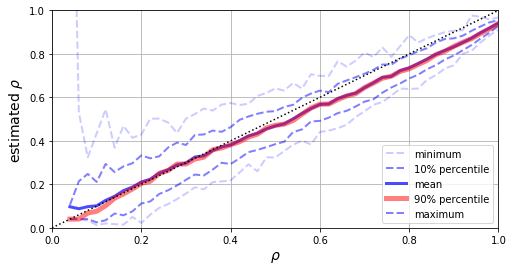

In [18]:
plt.figure(figsize=(8,4))
plt.plot(rhos ,min_rhos_RF, c='b',alpha = 0.2 ,linewidth=2.0, linestyle = '--')


plt.plot(rhos ,qua_rhos_RF_10, c='b',alpha = 0.5 ,linewidth=2.0, linestyle = '--')


plt.plot(rhos ,avg_rhos_RF, c='b',alpha = 0.7 ,linewidth=3.0)
plt.plot(rhos ,media_rhos_RF, c='r',alpha = 0.5 ,linewidth=5.0)


plt.plot(rhos ,qua_rhos_RF_90, c='b',alpha = 0.5 ,linewidth=2.0, linestyle = '--')


plt.plot(rhos ,max_rhos_RF, c='b',alpha = 0.2 ,linewidth=2.0, linestyle = '--')


plt.legend(['minimum',
            '10% percentile',
            'mean',
            '90% percentile',
           'maximum'])

plt.plot([0,1],[0,1],color='k', linestyle = ':')
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(axis='both')
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel('estimated ' + r'$\rho$', fontsize=14)
#plt.savefig(address_save_figure)
plt.show()

In [13]:
print(r'$\rho$')

$\rho$
